## **Challenge Técnico (Core)**

### **Objetivo:**
Los estudiantes deberán participar en una competencia de Kaggle, realizar un análisis completo del dataset, entrenar y evaluar al menos cinco modelos diferentes, y realizar un benchmark para comparar su rendimiento. El resultado final debe ser subido a GitHub.

### **Pasos del Challenge:**

**1. Registro en Kaggle y Elección de Competencia:**

 - Los estudiantes deben registrarse en Kaggle si no lo han hecho aún.

 - Elegir una competencia activa que esté alineada con los conocimientos y técnicas aprendidas (por ejemplo, una competencia de clasificación o regresión).


 **2. Carga y Exploración Inicial de Datos:**

 - Descargar el dataset de la competencia.

 - Realizar una exploración inicial para entender la estructura del dataset y las características disponibles.

 - Identificar y documentar valores faltantes y outliers.


 **3. Análisis Exploratorio de Datos (EDA):**

 - Calcular estadísticas descriptivas básicas.

 - Crear visualizaciones para entender la distribución de las variables y sus relaciones.

 - Detectar y tratar valores faltantes y outliers.


 **4. Preprocesamiento de Datos:**

 - Transformar las columnas según sea necesario (codificación de variables categóricas, escalado de características numéricas).

 - Dividir el dataset en conjuntos de entrenamiento y prueba.


 **5. Implementación de Modelos y Benchmark:**

 - Entrenar y evaluar al menos cinco modelos diferentes, como Regresión Logística, K-Nearest Neighbors (KNN), Árbol de Decisión, XGBoost y LightGBM.

 - Utilizar validación cruzada para evaluar el rendimiento inicial de los modelos.

 - Optimizar los hiperparámetros de los modelos seleccionados utilizando GridSearchCV o RandomizedSearchCV.

 - Comparar el rendimiento de los modelos utilizando métricas adecuadas.


 **6. Documentación y Entrega:**

 - Documentar todo el proceso en un notebook de Jupyter.

 - Subir el notebook, los resultados y cualquier script adicional a un repositorio de GitHub.

 - Crear un tag de liberación (v1.0.0) para esta versión del proyecto en GitHub

### **Dataset Description**
### **Overview**

**The data has been split into two groups:**

- training set (train.csv)

- test set (test.csv)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

| Variable   | Definition                              | Key                                      |
|------------|----------------------------------------|------------------------------------------|
| Survival   | Survival                               | 0 = No, 1 = Yes                         |
| Pclass     | Ticket class                           | 1 = 1st, 2 = 2nd, 3 = 3rd               |
| Sex        | Sex                                    |                                          |
| Age        | Age in years                           |                                          |
| Sibsp      | # of siblings / spouses aboard Titanic |                                          |
| Parch      | # of parents / children aboard Titanic |                                          |
| Ticket     | Ticket number                          |                                          |
| Fare       | Passenger fare                         |                                          |
| Cabin      | Cabin number                           |                                          |
| Embarked   | Port of Embarkation                   | C = Cherbourg, Q = Queenstown, S = Southampton |



In [1]:
import pandas as pd

# Especificar las rutas de los archivos
test_file = r"C:\Users\Andy\Documents\CodingDojo\Módulo_2_ML\Tareas_ML\Data_Tareas_ML\Titanic\test.csv"
train_file = r"C:\Users\Andy\Documents\CodingDojo\Módulo_2_ML\Tareas_ML\Data_Tareas_ML\Titanic\train.csv"

# Cargar los datasets
test_data = pd.read_csv(test_file)
train_data = pd.read_csv(train_file)

# Convertir nombres de columnas a minúsculas
train_data.columns = train_data.columns.str.lower()
test_data.columns = test_data.columns.str.lower()

# Añadir columna de fuente
train_data['source'] = 'train'
test_data['source'] = 'test'

# Combinar los datasets
combined_data = pd.concat([train_data, test_data], ignore_index=True)

# Verificar las columnas y estructura inicial
print(f"Columnas del dataset combinado: {combined_data.columns}")
print(combined_data.info())

Columnas del dataset combinado: Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked', 'source'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  1309 non-null   int64  
 1   survived     891 non-null    float64
 2   pclass       1309 non-null   int64  
 3   name         1309 non-null   object 
 4   sex          1309 non-null   object 
 5   age          1046 non-null   float64
 6   sibsp        1309 non-null   int64  
 7   parch        1309 non-null   int64  
 8   ticket       1309 non-null   object 
 9   fare         1308 non-null   float64
 10  cabin        295 non-null    object 
 11  embarked     1307 non-null   object 
 12  source       1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 133.1+ KB
None

In [2]:
# Eliminar columnas irrelevantes
irrelevant_columns = ['ticket', 'cabin', 'name']
combined_data_cleaned = combined_data.drop(columns=irrelevant_columns, errors='ignore')

# Identificar columnas y convertir tipos
columns_to_convert = {
    'survived': 'category',
    'pclass': 'category',
    'sex': 'category',
    'age': 'float',
    'sibsp': 'int',
    'parch': 'int',
    'embarked': 'category',
    'source': 'category'
}
for col, dtype in columns_to_convert.items():
    if col in combined_data_cleaned.columns:
        combined_data_cleaned[col] = combined_data_cleaned[col].astype(dtype)

print("\nTipos de datos después de la conversión:")
print(combined_data_cleaned.dtypes)


Tipos de datos después de la conversión:
passengerid       int64
survived       category
pclass         category
sex            category
age             float64
sibsp             int64
parch             int64
fare            float64
embarked       category
source         category
dtype: object


In [3]:
# Imputar valores faltantes
for col in combined_data_cleaned.columns:
    if combined_data_cleaned[col].isnull().sum() > 0:
        if combined_data_cleaned[col].dtype.name == 'category':  # Categóricas
            mode_value = combined_data_cleaned[col].mode()[0]
            combined_data_cleaned[col].fillna(mode_value, inplace=True)
            print(f"Imputados valores faltantes en '{col}' con su moda: {mode_value}")
        else:  # Numéricas
            std_dev = combined_data_cleaned[col].std()
            mean_value = combined_data_cleaned[col].mean()
            median_value = combined_data_cleaned[col].median()
            if std_dev / mean_value > 0.5:
                combined_data_cleaned[col].fillna(median_value, inplace=True)
                print(f"Imputados valores faltantes en '{col}' con su mediana: {median_value}")
            else:
                combined_data_cleaned[col].fillna(mean_value, inplace=True)
                print(f"Imputados valores faltantes en '{col}' con su media: {mean_value:.2f}")

Imputados valores faltantes en 'survived' con su moda: 0.0
Imputados valores faltantes en 'age' con su media: 29.88
Imputados valores faltantes en 'fare' con su mediana: 14.4542
Imputados valores faltantes en 'embarked' con su moda: S


C:\Users\Andy\AppData\Local\Temp\ipykernel_24900\199167565.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data_cleaned[col].fillna(mode_value, inplace=True)
C:\Users\Andy\AppData\Local\Temp\ipykernel_24900\199167565.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [4]:
# Estadísticas descriptivas para columnas numéricas
numerical_stats = combined_data_cleaned.describe().round(2)

print("\nEstadísticas descriptivas para columnas numéricas:")
print(numerical_stats)

# Seleccionar columnas categóricas ignorando 'source'
categorical_columns = combined_data_cleaned.select_dtypes(include='category').columns

# Estadísticas descriptivas para columnas categóricas
categorical_stats = combined_data_cleaned[categorical_columns].describe()

print("\nEstadísticas descriptivas para columnas categóricas:")
print(categorical_stats)

# Resumen adicional para variables categóricas con frecuencias
print("\nFrecuencias de categorías por columna categórica:")
for col in categorical_columns:
    print(f"\n{col} - Frecuencia de categorías:")
    print(combined_data_cleaned[col].value_counts())


Estadísticas descriptivas para columnas numéricas:
       passengerid      age    sibsp    parch     fare
count      1309.00  1309.00  1309.00  1309.00  1309.00
mean        655.00    29.88     0.50     0.39    33.28
std         378.02    12.88     1.04     0.87    51.74
min           1.00     0.17     0.00     0.00     0.00
25%         328.00    22.00     0.00     0.00     7.90
50%         655.00    29.88     0.00     0.00    14.45
75%         982.00    35.00     1.00     0.00    31.28
max        1309.00    80.00     8.00     9.00   512.33

Estadísticas descriptivas para columnas categóricas:
        survived  pclass   sex embarked source
count     1309.0    1309  1309     1309   1309
unique       2.0       3     2        3      2
top          0.0       3  male        S  train
freq       967.0     709   843      916    891

Frecuencias de categorías por columna categórica:

survived - Frecuencia de categorías:
survived
0.0    967
1.0    342
Name: count, dtype: int64

pclass - Frecuenc

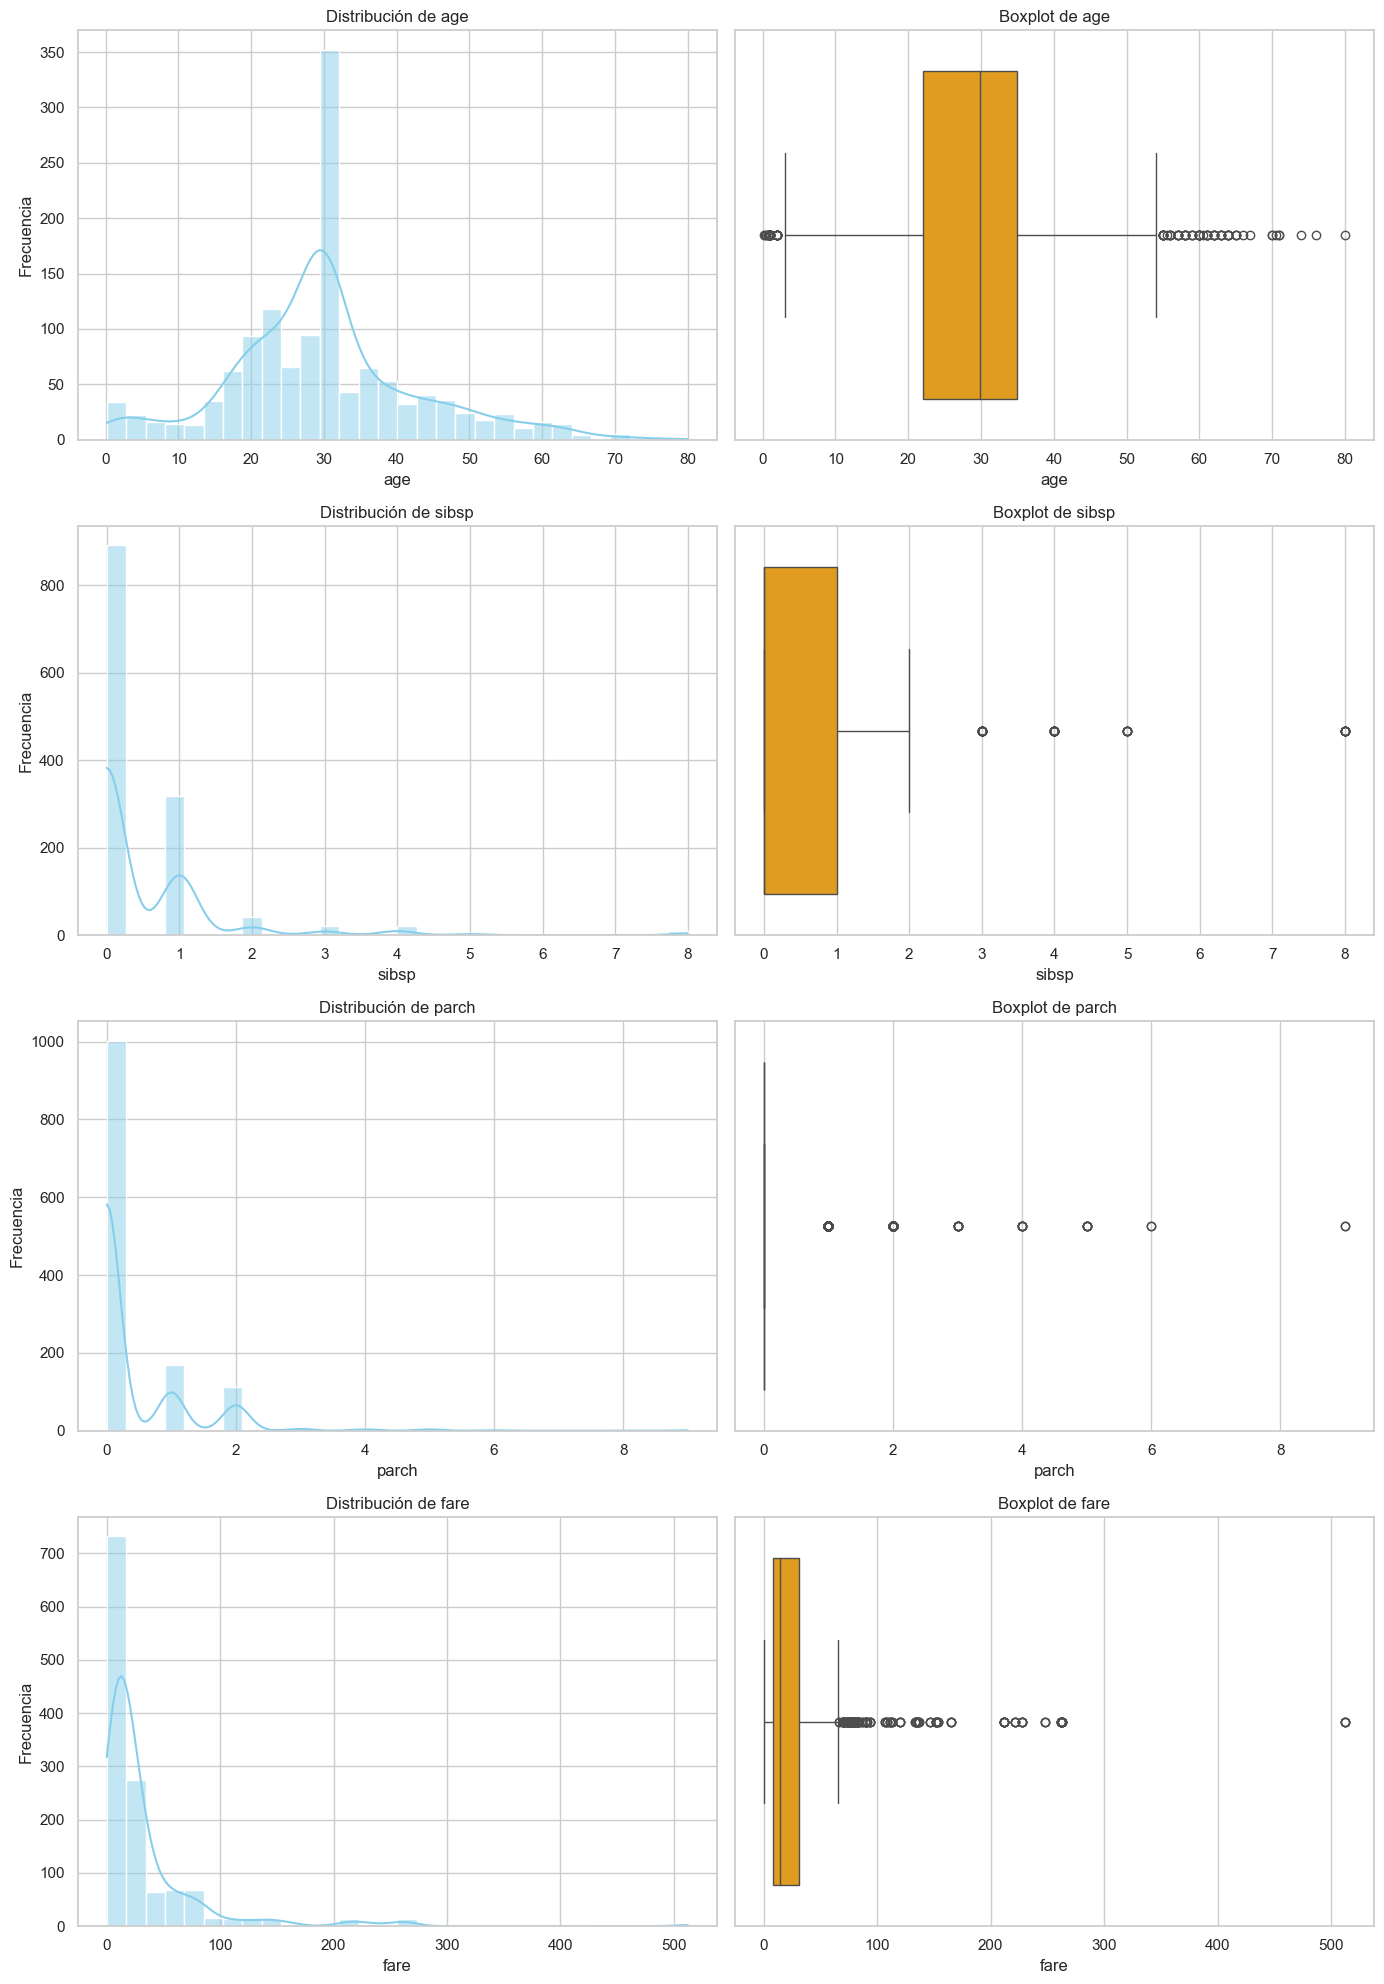

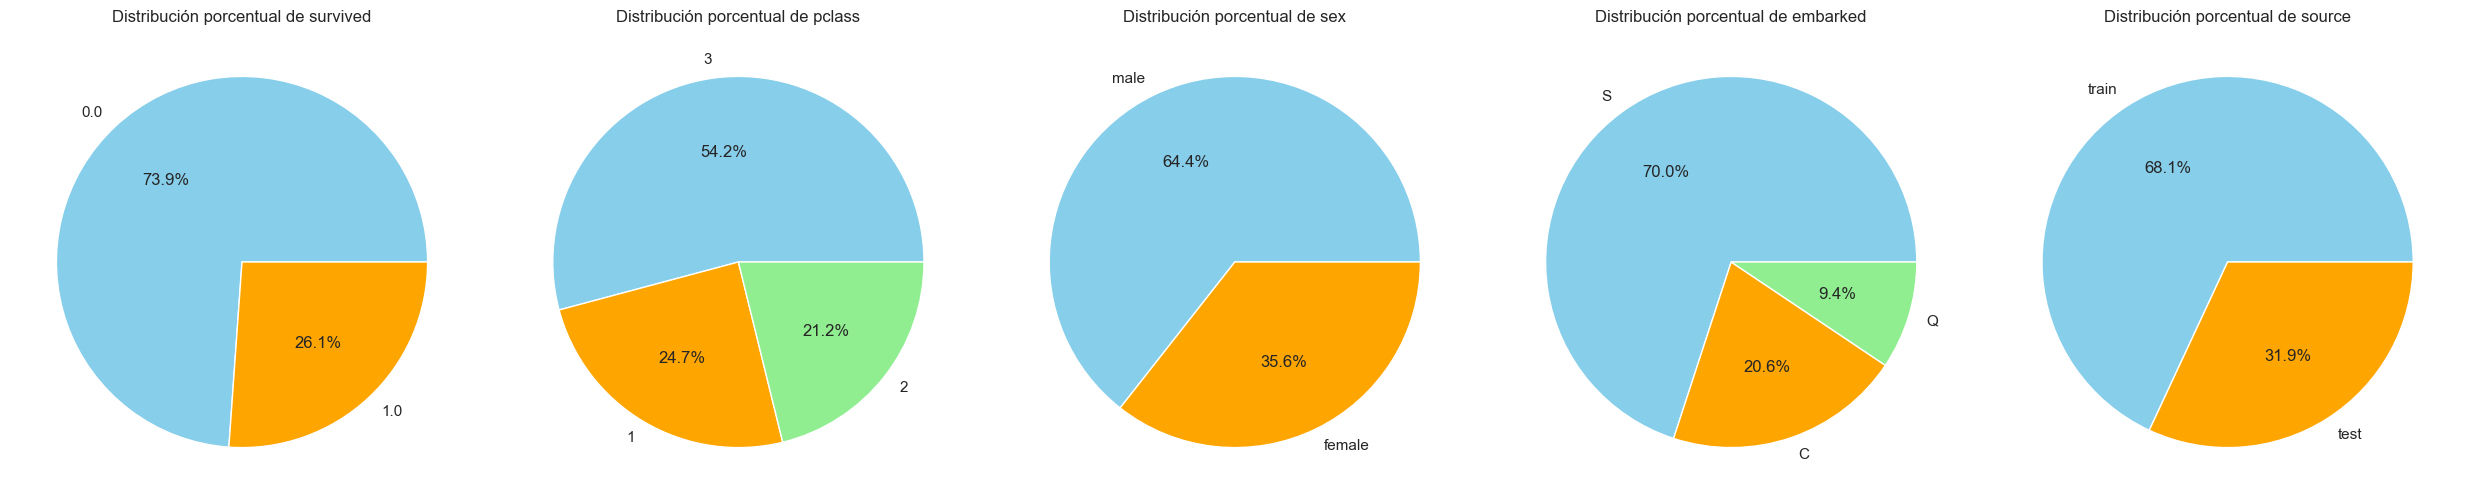

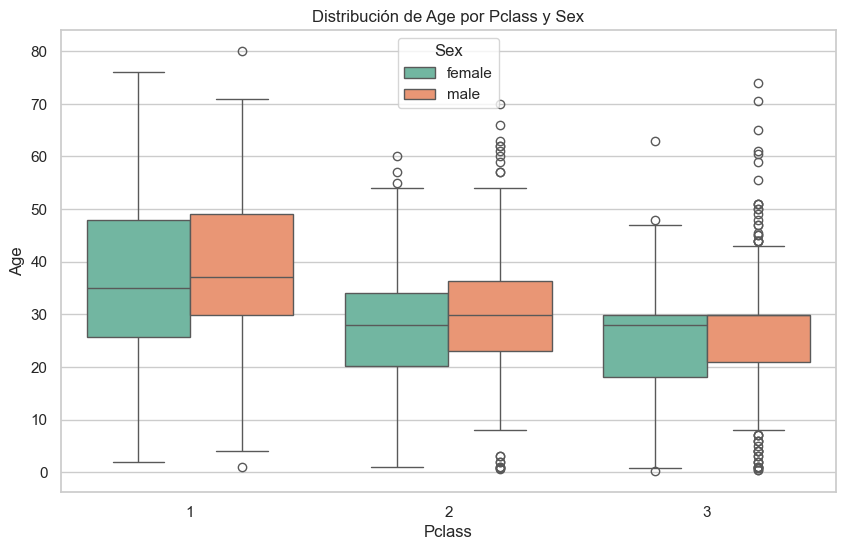

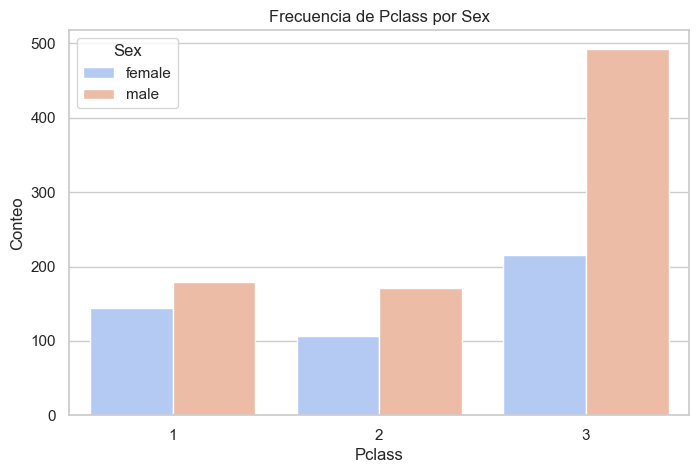

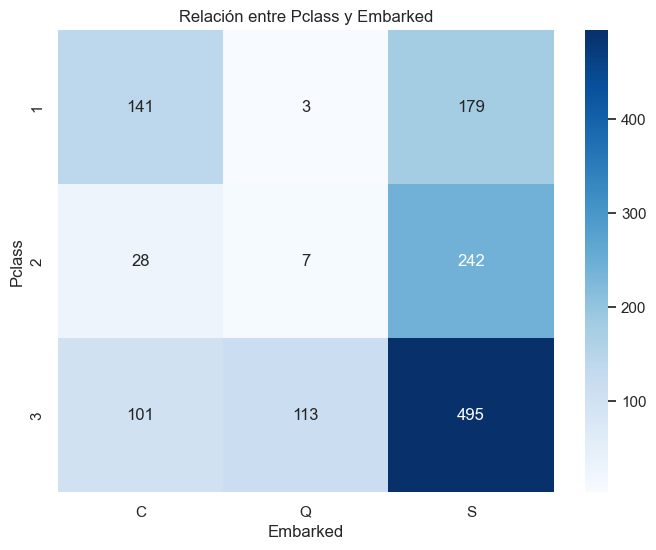

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración general de estilo
sns.set(style="whitegrid")

# Verificar las columnas disponibles en el dataset después del procesamiento
available_columns = combined_data_cleaned.columns

# Filtrar columnas numéricas excluyendo 'survived' y columnas eliminadas como 'fare'
numerical_columns = [
    col for col in combined_data_cleaned.select_dtypes(include=['int', 'float']).columns 
    if col in available_columns and col != 'survived'
]

# Filtrar columnas numéricas ignorando 'PassengerId'
numerical_columns = [
    col for col in combined_data_cleaned.select_dtypes(include=['int', 'float']).columns
    if col != 'passengerid'
]

# Gráficos univariados para variables numéricas
if numerical_columns:
    fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(14, 5 * len(numerical_columns)))
    for i, col in enumerate(numerical_columns):
        # Histograma con KDE
        sns.histplot(combined_data_cleaned[col], kde=True, bins=30, color="skyblue", ax=axes[i, 0])
        axes[i, 0].set_title(f"Distribución de {col}")
        axes[i, 0].set_xlabel(col)
        axes[i, 0].set_ylabel("Frecuencia")

        # Boxplot
        sns.boxplot(x=combined_data_cleaned[col], color="orange", ax=axes[i, 1])
        axes[i, 1].set_title(f"Boxplot de {col}")
        axes[i, 1].set_xlabel(col)

    plt.tight_layout()
    plt.show()

# Convertir categorical_columns a lista explícitamente
categorical_columns = list(combined_data_cleaned.select_dtypes(include='category').columns)

# Gráficos univariados para variables categóricas
if len(categorical_columns) > 0:  # Verificar si hay columnas categóricas
    fig, axes = plt.subplots(1, len(categorical_columns), figsize=(5 * len(categorical_columns), 5))
    if len(categorical_columns) == 1:
        axes = [axes]  # Convertir en iterable si hay solo una columna categórica
    for i, col in enumerate(categorical_columns):
        # Gráfico de pastel
        combined_data_cleaned[col].value_counts().plot.pie(
            autopct='%1.1f%%',
            colors=["skyblue", "orange", "lightgreen"],
            ax=axes[i]
        )
        axes[i].set_title(f"Distribución porcentual de {col}")
        axes[i].set_ylabel("")  # Eliminar etiquetas del eje Y para gráficos de pastel

    plt.tight_layout()
    plt.show()


# Boxplot: Distribución de age por pclass y sex
plt.figure(figsize=(10, 6))
sns.boxplot(x='pclass', y='age', hue='sex', data=combined_data_cleaned, palette="Set2")
plt.title("Distribución de Age por Pclass y Sex")
plt.xlabel("Pclass")
plt.ylabel("Age")
plt.legend(title="Sex")
plt.show()

# Countplot: Frecuencia de Pclass por Sex
plt.figure(figsize=(8, 5))
sns.countplot(x='pclass', hue='sex', data=combined_data_cleaned, palette="coolwarm")
plt.title("Frecuencia de Pclass por Sex")
plt.xlabel("Pclass")
plt.ylabel("Conteo")
plt.legend(title="Sex")
plt.show()

# Heatmap: Relación cruzada entre Pclass y Embarked
plt.figure(figsize=(8, 6))
cross_tab = pd.crosstab(combined_data_cleaned['pclass'], combined_data_cleaned['embarked'])
sns.heatmap(cross_tab, annot=True, cmap="Blues", fmt="d")
plt.title("Relación entre Pclass y Embarked")
plt.xlabel("Embarked")
plt.ylabel("Pclass")
plt.show()

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Guardar PassengerId antes de la separación
test_passenger_ids = combined_data_cleaned.loc[combined_data_cleaned['source'] == 'test', 'passengerid']

# Separar conjuntos de entrenamiento y prueba
train_data = combined_data_cleaned[combined_data_cleaned['source'] == 'train']
test_data = combined_data_cleaned[combined_data_cleaned['source'] == 'test']

# Preparar características y objetivo
X_train = train_data.drop(columns=['survived', 'source', 'passengerid'])
y_train = train_data['survived']
X_test = test_data.drop(columns=['survived', 'source', 'passengerid'])

# Transformaciones
categorical_features = X_train.select_dtypes(include='category').columns
numerical_features = X_train.select_dtypes(include=['int', 'float']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ]
)

# Aplicar transformaciones
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

# Inicializar modelos
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),  # Eliminar eval_metric aquí
}

# Entrenamiento y evaluación
for name, model in models.items():
    print(f"\nEntrenando el modelo: {name}")
    model.fit(X_train_transformed, y_train)  # Entrenar el modelo
    y_pred = model.predict(X_train_transformed)  # Predicción
    accuracy = accuracy_score(y_train, y_pred)  # Calcular Accuracy
    print(f"{name} - Accuracy: {accuracy:.4f}")


# Inicializar LightGBM con configuraciones ajustadas
lgbm_model = LGBMClassifier(
    random_state=42,
    force_row_wise=True,  # Evitar el warning sobre formato fila a fila
    min_gain_to_split=0.01,  # Ajustar ganancia mínima para realizar un split
    n_jobs=-1  # Usar todos los núcleos disponibles
)

# Entrenamiento
print("\nEntrenando el modelo: LightGBM")
lgbm_model.fit(X_train_transformed, y_train)

# Evaluación
y_pred_lgbm = lgbm_model.predict(X_train_transformed)
accuracy_lgbm = accuracy_score(y_train, y_pred_lgbm)
print(f"LightGBM - Accuracy: {accuracy_lgbm:.4f}")



Entrenando el modelo: Logistic Regression
Logistic Regression - Accuracy: 0.8058

Entrenando el modelo: K-Nearest Neighbors
K-Nearest Neighbors - Accuracy: 0.8608

Entrenando el modelo: Decision Tree
Decision Tree - Accuracy: 0.9820

Entrenando el modelo: XGBoost
XGBoost - Accuracy: 0.9686

Entrenando el modelo: LightGBM
[LightGBM] [Warning] min_gain_to_split is set=0.01, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.01
[LightGBM] [Warning] min_gain_to_split is set=0.01, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.01
[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Total Bins 226
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [19]:
# Predicciones finales con el mejor modelo
best_model = models["Logistic Regression"]  # Ajustar al modelo seleccionado
final_predictions = best_model.predict(X_test_transformed)

# Crear DataFrame para guardar las predicciones
output = pd.DataFrame({
    "PassengerId": test_passenger_ids,
    "Survived": final_predictions
})

# Guardar el archivo CSV de predicciones
output.to_csv("submission.csv", index=False)
print("\nPredicciones realizadas y guardadas en 'submission.csv'.")


Predicciones realizadas y guardadas en 'submission.csv'.


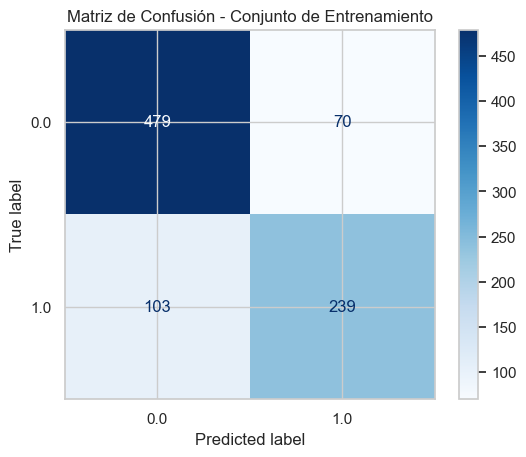

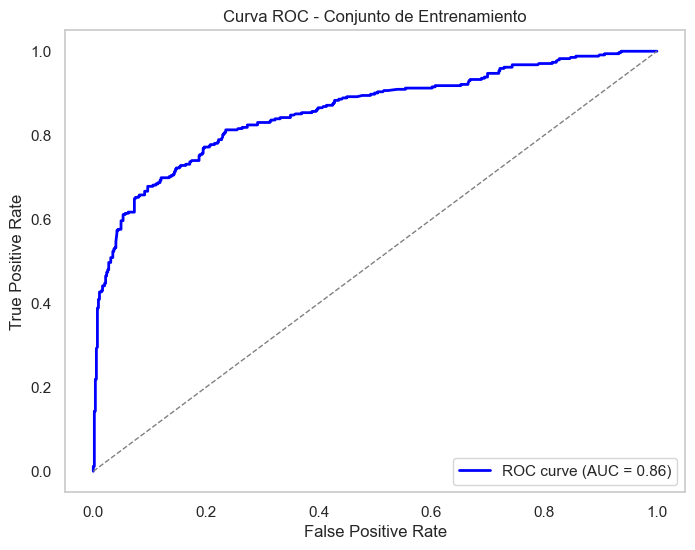

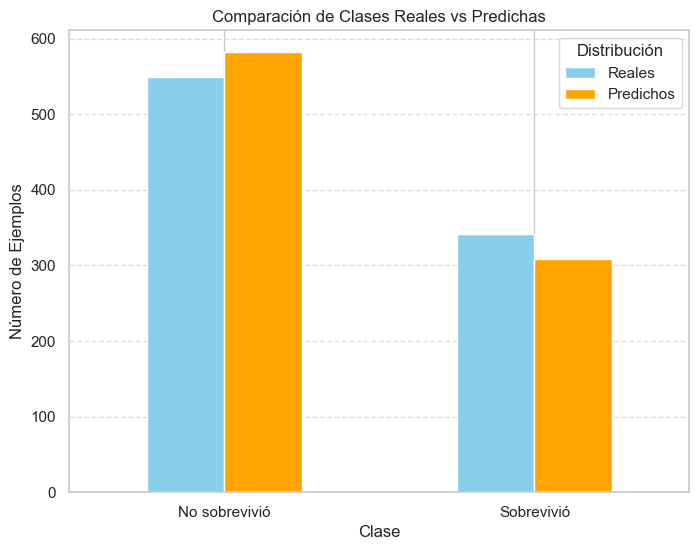

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# Predicciones en el conjunto de entrenamiento
train_predictions = best_model.predict(X_train_transformed)
train_pred_prob = best_model.predict_proba(X_train_transformed)[:, 1] if hasattr(best_model, "predict_proba") else None

# 1. Matriz de Confusión
cm = confusion_matrix(y_train, train_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Matriz de Confusión - Conjunto de Entrenamiento")
plt.show()

# 2. Curva ROC y AUC
if train_pred_prob is not None:
    fpr, tpr, _ = roc_curve(y_train, train_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Curva ROC - Conjunto de Entrenamiento")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

# 3. Gráfico de Barras: Comparación de Clases Reales vs Predicciones
real_counts = y_train.value_counts()
pred_counts = pd.Series(train_predictions).value_counts()

comparison_df = pd.DataFrame({
    "Reales": real_counts,
    "Predichos": pred_counts
}).fillna(0)

# Ajuste de etiquetas para consistencia
comparison_df.index = ["No sobrevivió", "Sobrevivió"]

comparison_df.plot(kind="bar", figsize=(8, 6), color=["skyblue", "orange"])
plt.title("Comparación de Clases Reales vs Predichas")
plt.xlabel("Clase")
plt.ylabel("Número de Ejemplos")
plt.xticks(rotation=0)
plt.legend(title="Distribución")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [21]:
output.to_csv(r"C:\Users\Andy\Documents\CodingDojo\Módulo_2_ML\Tareas_ML\Data_Tareas_ML\Titanic\submission.csv", index=False)